# Pulse sequence evaluation

Using arbitrary units. Energy is normalized to the standard deviation in chemical shift strengths. Reduced Planck's constant $\hbar \equiv 1$.

In [41]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import pandas as pd

In [2]:
sys.path.append('..')

In [3]:
import pulse_sequences as ps

## Define system

In [277]:
delay = 1e-2  # time is relative to chemical shift strength
pulse_width = 5e-3
N = 4  # number of spins
ensemble_size = 50

In [278]:
X, Y, Z = ps.get_collective_spin(N)

In [312]:
Hsys_ensemble = [ps.get_Hsys(N) for _ in range(ensemble_size)]
pulses_ensemble = [
    ps.get_pulses(H, X, Y, Z, pulse_width, delay, rot_error=0.01) for H in Hsys_ensemble
]

In [280]:
Utarget = qt.identity(Hsys_ensemble[0].dims[0])

## Define and evaluate pulse sequences



In [313]:
ps.get_mean_fidelity(ps.yxx24, Utarget, pulses_ensemble)

0.9977176520000206

In [314]:
ps.get_mean_fidelity(ps.yxx48, Utarget, pulses_ensemble)

0.9945031100616245

In [310]:
ps.get_mean_fidelity(ps.mcts12_2, Utarget, pulses_ensemble)

0.9775573013008553

In [132]:
ps.get_mean_fidelity(ps.mcts12_3, Utarget, pulses_ensemble)

0.9811843516175262

In [133]:
ps.get_mean_fidelity(ps.mcts12_4, Utarget, pulses_ensemble)

0.9639856940344623

In [ ]:
# fids = []
# Uexp = qt.identity(Utarget.dims[0])
# for p in ((yxx48 + ',')*1)[:-1].split(','):
#     Uexp = pulses_dict_ensemble[1][p] * Uexp
#     fids.append(qt.metrics.average_gate_fidelity(Uexp, Utarget))
#
# plt.plot(-np.log10(1-np.array(fids)))
# plt.ylabel('Reward')
# plt.xlabel('Pulse number')

## Check candidates from CSV file

In [300]:
df = pd.read_csv('../../data/2021-02/20210213-191154/candidates_sorted.csv')

In [301]:
df['sequence'] = df['sequence'].apply(lambda x: [int(i) for i in x[1:-1].split(',')])

In [302]:
df['last_pulse'] = df['last_pulse'].apply(lambda x: [float(i) for i in x[1:-1].split(',')])

In [303]:
df['last_pulse'] = df['last_pulse'].apply(lambda x: np.argwhere(x)[0][0])

In [304]:
df['full_sequence'] = df['sequence'] + df['last_pulse'].apply(lambda x: [x])

In [316]:
seqs = []
fidelities = []
for i in range(10):
    candidate = df['full_sequence'][i]
    seqs.append(candidate)
    f = ps.get_mean_fidelity(candidate, Utarget, pulses_ensemble)
    fidelities.append(f)
    print(i, f)

0 0.9784564951709153
1 0.9693756534626261
2 0.9861487041698399
3 0.9814814228618427
4 0.9749209861322079
5 0.9590175324306149
6 0.9811328468966448
7 0.9712645299494337
8 0.9811330446913564
9 0.98191224448765


In [298]:
-np.log10(1-0.9924375396910494)

2.1213368916980175

In [222]:
print(df['full_sequence'][23])

[2, 3, 3, 3, 3, 2, 3, 2, 4, 2, 4, 1, 2, 3, 3, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 0, 4, 2, 2, 2, 0, 4, 4, 3, 1, 3, 4, 4, 0, 0, 0, 2, 2, 2, 0, 3, 2]


In [264]:
names = [
    r'\tau_{\pi/2}, \tau',
    r'X, \tau',
    r'-X, \tau',
    r'Y, \tau',
    r'-Y, \tau',
]

In [268]:
sequence_string = [names[i] for i in df['full_sequence'][23]]

print('$', ', '.join(sequence_string[:12]), '$')
print('$', ', '.join(sequence_string[12:24]), '$')
print('$', ', '.join(sequence_string[24:36]), '$')
print('$', ', '.join(sequence_string[36:48]), '$')

$ -X, \tau, Y, \tau, Y, \tau, Y, \tau, Y, \tau, -X, \tau, Y, \tau, -X, \tau, -Y, \tau, -X, \tau, -Y, \tau, X, \tau $
$ -X, \tau, Y, \tau, Y, \tau, Y, \tau, \tau_{\pi/2}, \tau, Y, \tau, \tau_{\pi/2}, \tau, -X, \tau, Y, \tau, -X, \tau, -X, \tau, -X, \tau $
$ Y, \tau, -X, \tau, \tau_{\pi/2}, \tau, -Y, \tau, -X, \tau, -X, \tau, -X, \tau, \tau_{\pi/2}, \tau, -Y, \tau, -Y, \tau, Y, \tau, X, \tau $
$ Y, \tau, -Y, \tau, -Y, \tau, \tau_{\pi/2}, \tau, \tau_{\pi/2}, \tau, \tau_{\pi/2}, \tau, -X, \tau, -X, \tau, -X, \tau, \tau_{\pi/2}, \tau, Y, \tau, -X, \tau $


Pulse sequence 23:

$ -X, \tau, Y, \tau, Y, \tau, Y, \tau, Y, \tau, -X, \tau, Y, \tau, -X, \tau, -Y, \tau, -X, \tau, -Y, \tau, X, \tau $
$ -X, \tau, Y, \tau, Y, \tau, Y, \tau, \tau_{\pi/2}, \tau, Y, \tau, \tau_{\pi/2}, \tau, -X, \tau, Y, \tau, -X, \tau, -X, \tau, -X, \tau $
$ Y, \tau, -X, \tau, \tau_{\pi/2}, \tau, -Y, \tau, -X, \tau, -X, \tau, -X, \tau, \tau_{\pi/2}, \tau, -Y, \tau, -Y, \tau, Y, \tau, X, \tau $
$ Y, \tau, -Y, \tau, -Y, \tau, \tau_{\pi/2}, \tau, \tau_{\pi/2}, \tau, \tau_{\pi/2}, \tau, -X, \tau, -X, \tau, -X, \tau, \tau_{\pi/2}, \tau, Y, \tau, -X, \tau $

In [223]:
fidelities = np.array(
    [ps.get_fidelity(df['full_sequence'][23], Utarget, pulses)
     for pulses in pulses_ensemble]
)

In [224]:
np.mean(fidelities)

0.9901248881032397

In [225]:
np.std(fidelities)

0.013279629621136551

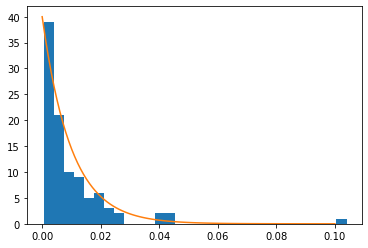

In [231]:
plt.hist(1 - fidelities, bins=30)
# fit exponential curve
X = np.linspace(0, .1, 100)
Y = np.exp(-1 / np.mean(1 - fidelities) * X)
plt.plot(X, Y * 40)